<a href="https://colab.research.google.com/github/alsantosad/PROJECT-ROCKET/blob/master/M4TRABALHO_EM_GRUPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***TRABALHO EM GRUPO***

##***CONTEXTO***
Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) para realizar uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol.

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e
Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção
de petróleo, gás e biocombustíveis no Brasil;
realiza e divulga pesquisas sobre
qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços
desses produtos; promove estudos sobre o potencial petrolífero e o
desenvolvimento do setor; entre outras atividades

Realizar a análise exploratória a partir das fontes de dados
disponíveis no portal gov.br.

Serão utilizados os arquivos
dos dois últimos meses do ano atual (Etanol Hidratado +
Gasolina C) contendo a série histórica dos preços da
gasolina e do etanol em todo o Brasil.


A análise deve responder às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou aumento?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.

##***Importando Bibliotecas***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##***Analise Exploratória***

###***Leitura dos Datasets***

In [2]:
#Lendo Csv pelo link do site
url1 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-10.csv'
df1 = pd.read_csv(url1,sep=';')


In [3]:
#Lendo Csv pelo link do site
url2 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-11.csv'
df2 = pd.read_csv(url2,sep=';')

###***Visualizando os Datasets Separados***

In [4]:
#Visualizando os dados do data set
df1.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,02/10/2023,"6,08",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,02/10/2023,"6,08",NaN,R$ / litro,VIBRA


In [5]:
#Visualizando os dados do data set
df2.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA


In [6]:
#Visualizando numero de linhas e colunas dos 2 Datasets
print(df1.shape,df2.shape)

(57475, 16) (52543, 16)


###***Juntando os Datasets com a Função (`concat()`)***

In [7]:
#Datasets juntos `df1, df2` e ignorando o index para melhor organização do Dataset
#Ignore index ajuda não dar erro
df = pd.concat([df1, df2],ignore_index=True)
df.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,02/10/2023,"6,08",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,02/10/2023,"6,08",NaN,R$ / litro,VIBRA


##***Limpeza dos Dados que vamos Trabalhar***

###***Visualizando as valores da coluna de varias formas***

In [8]:
#Visualizando as informações da coluna "Valor de Compra"
df['Valor de Compra'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110018 entries, 0 to 110017
Series name: Valor de Compra
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 859.6 KB


In [9]:
# Visualizando a descrição
df['Valor de Compra'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
110013   NaN
110014   NaN
110015   NaN
110016   NaN
110017   NaN
Name: Valor de Compra, Length: 110018, dtype: float64>

In [10]:
# Visualizando os tipos de valores
df['Valor de Compra'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
110013   NaN
110014   NaN
110015   NaN
110016   NaN
110017   NaN
Name: Valor de Compra, Length: 110018, dtype: float64>

In [11]:
#Visualizando os Tipos unicos de Valores na coluna
#Interessante, a função (.unique()) retorna um array
#A função (.unique) sem parentese retorna uma serie
#Diferentes metodos de visualização
df['Valor de Compra'].unique()

array([nan])

###***Corrigindo valores das colunas***

In [12]:
# Corrigindo valores em "Valor de Venda". Substituindo as (,)virgulas por (.)ponto.
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

In [13]:
# Formatando a coluna Data da Coleta de str para DATE utilizando a função TO_DATETIME
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,2023-10-02,6.08,NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,2023-10-02,6.08,NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,2023-10-02,4.78,NaN,R$ / litro,VIBRA
3,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,2023-10-02,5.79,NaN,R$ / litro,VIBRA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,ETANOL,2023-10-02,4.29,NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110013,SE,SP,BIRIGUI,POSTO UNI MIRAGAIA II LTD,48.886.073/0001-59,AVENIDA EUCLIDES MIRAGAIA,2704,NaN,VILA ISABEL MARIN,16200-130,GASOLINA ADITIVADA,2023-11-30,5.99,NaN,R$ / litro,IPIRANGA
110014,SE,MG,UBA,POSTO UIRAPURU LTDA,17.759.721/0004-25,RUA ANTENOR MACHADO,268,NaN,CENTRO,36500-012,GASOLINA,2023-11-30,5.39,NaN,R$ / litro,RAIZEN
110015,SE,MG,UBA,POSTO UIRAPURU LTDA,17.759.721/0004-25,RUA ANTENOR MACHADO,268,NaN,CENTRO,36500-012,GASOLINA ADITIVADA,2023-11-30,5.67,NaN,R$ / litro,RAIZEN
110016,SE,SP,BIRIGUI,AUTO POSTO BENEDETTI DE BIRIGUI LTDA,50.610.749/0001-29,AVENIDA EUCLIDES MIRAGAIA,1678,NaN,VILA PONTES,16200-130,GASOLINA,2023-11-30,4.87,NaN,R$ / litro,BRANCA


###***Limpeza dos Dados, Removendo colunas indesejadas***

In [14]:
#Removendo colunas que não serão uteis.
dfproc = df.drop(columns=['Valor de Compra','Nome da Rua','Numero Rua','Complemento','Cep','CNPJ da Revenda','Revenda'])
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-10-02,6.08,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-10-02,6.08,R$ / litro,VIBRA


In [15]:
#Visualizando as informações da coluna, pois vamos trabalhar com ela.
dfproc['Valor de Venda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110018 entries, 0 to 110017
Series name: Valor de Venda
Non-Null Count   Dtype  
--------------   -----  
110018 non-null  float64
dtypes: float64(1)
memory usage: 859.6 KB


##***1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?***

In [16]:
#Verificando se o média do Valor do Etanol está de acordo com o gráfico mostrado
dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2         4.78
4         4.29
7         4.49
10        4.99
13        4.59
          ... 
110002    3.67
110007    3.35
110009    2.94
110011    2.99
110017    2.99
Name: Valor de Venda, Length: 35407, dtype: float64>

In [17]:
#Achando o Minimo e o Maximo do Valor de Venda do ETANOL
maior_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].max()
menor_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].min()
display(f'O maior valor do Etanol é {maior_valor_etanol}')
display(f'O menor valor do Etanol é {menor_valor_etanol}')

'O maior valor do Etanol é 6.6'

'O menor valor do Etanol é 2.78'

In [18]:
#Buscando o maior valor de Venda do Etanol (Verificando Outlier)
maior_valor = dfproc[(dfproc['Produto'] == 'ETANOL') & (dfproc['Valor de Venda'] == 6.6)]
maior_valor.head(4)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1912,N,PA,SANTAREM,PRAINHA,ETANOL,2023-10-02,6.6,R$ / litro,SABBÁ
1915,N,PA,SANTAREM,FATIMA,ETANOL,2023-10-02,6.6,R$ / litro,SABBÁ
1920,N,PA,SANTAREM,AEROPORTO VELHO,ETANOL,2023-10-02,6.6,R$ / litro,SABBÁ
13773,N,PA,SANTAREM,PRAINHA,ETANOL,2023-10-09,6.6,R$ / litro,SABBÁ


In [19]:
# Supondo que 'dados' é o DataFrame que contém seus dados
media_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f'Média do valor de venda do Etanol: {media_etanol}')


Média do valor de venda do Etanol: 3.8759711356511426


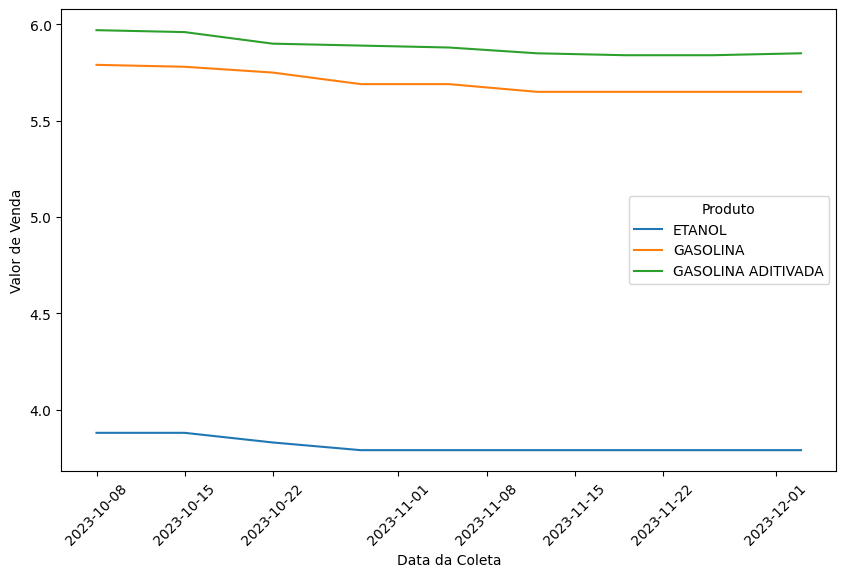

In [20]:
# Agrupando por semana e tipo de combustível, e calculando a média dos preços de venda
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median().reset_index()
#Plotando o gráfico de linha
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
sns.lineplot(data=comport, x='Data da Coleta', y='Valor de Venda', hue='Produto', ax=ax)
plt.show()


In [21]:
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median()
comport

Data da Coleta  Produto           
2023-10-08      ETANOL                3.88
                GASOLINA              5.79
                GASOLINA ADITIVADA    5.97
2023-10-15      ETANOL                3.88
                GASOLINA              5.78
                GASOLINA ADITIVADA    5.96
2023-10-22      ETANOL                3.83
                GASOLINA              5.75
                GASOLINA ADITIVADA    5.90
2023-10-29      ETANOL                3.79
                GASOLINA              5.69
                GASOLINA ADITIVADA    5.89
2023-11-05      ETANOL                3.79
                GASOLINA              5.69
                GASOLINA ADITIVADA    5.88
2023-11-12      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.85
2023-11-19      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.84
2023-11-26      ETANOL                3.79
                GAS

In [22]:
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-10-02,6.08,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-10-02,6.08,R$ / litro,VIBRA


##***2. Qual o preço médio da gasolina e do etanol nesses dois meses?***

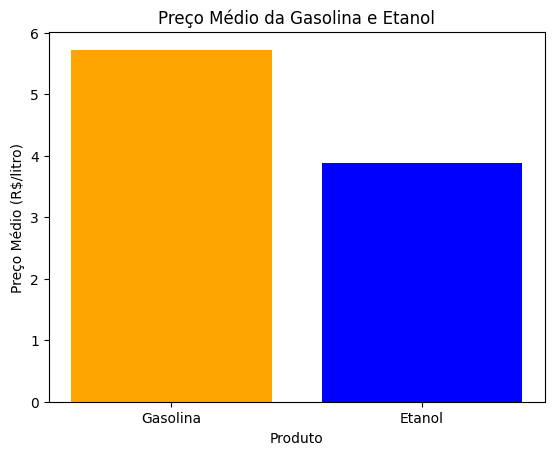

In [23]:
# Filtrar apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtrar apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcular o preço médio da gasolina
preco_medio_gasolina = gasolina_df['Valor de Venda'].mean()

# Calcular o preço médio do etanol
preco_medio_etanol = etanol_df['Valor de Venda'].mean()

# Dados para o gráfico
produtos = ['Gasolina', 'Etanol']
precos_medios = [preco_medio_gasolina, preco_medio_etanol]

# Criar o gráfico de barras
plt.bar(produtos, precos_medios, color=['orange', 'blue'])

# Adicionar rótulos e título ao gráfico
plt.xlabel('Produto')
plt.ylabel('Preço Médio (R$/litro)')
plt.title('Preço Médio da Gasolina e Etanol')

# Mostrar o gráfico
plt.show()


##***3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?***

In [24]:
dfproc.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-10-02,6.08,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-10-02,6.08,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,PLANALTO,ETANOL,2023-10-02,4.78,R$ / litro,VIBRA


In [25]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Obtém os 5 estados com os preços médios mais altos para a gasolina
top5_gasolina = media_gasolina_por_estado.nlargest(5)

# Obtém os 5 estados com os preços médios mais altos para o etanol
top5_etanol = media_etanol_por_estado.nlargest(5)

# Exibe os resultados
print('Top 5 Estados com Preço Médio mais Alto para Gasolina:')
print(top5_gasolina)

print('\nTop 5 Estados com Preço Médio mais Alto para Etanol:')
print(top5_etanol)


Top 5 Estados com Preço Médio mais Alto para Gasolina:
Estado - Sigla
AC    6.897989
AM    6.641314
RO    6.437161
PA    6.115723
SE    6.048859
Name: Valor de Venda, dtype: float64

Top 5 Estados com Preço Médio mais Alto para Etanol:
Estado - Sigla
AP    5.495000
RO    5.108294
RR    4.886667
AC    4.811099
PA    4.754736
Name: Valor de Venda, dtype: float64


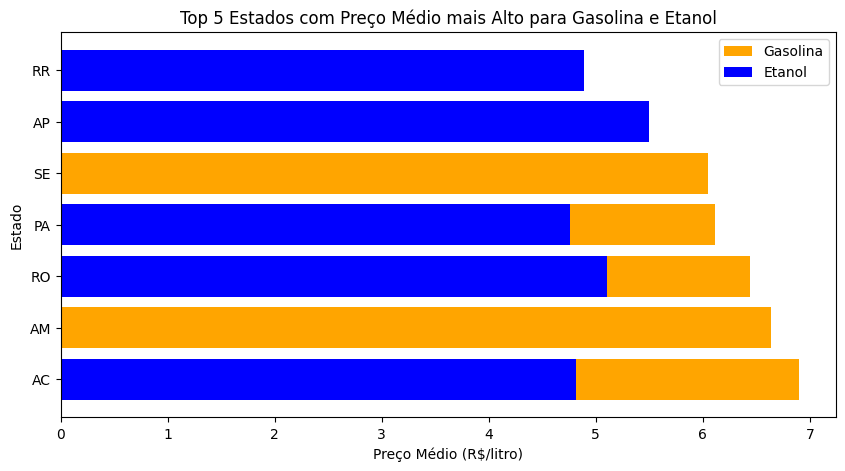

In [33]:
# Configuração do gráfico de barras para a gasolina
plt.figure(figsize=(10, 5))
plt.barh(top5_gasolina.index, top5_gasolina, color='orange', label='Gasolina')

# Configuração do gráfico de barras para o etanol
plt.barh(top5_etanol.index, top5_etanol, color='blue', label='Etanol')

# Adiciona rótulos e título ao gráfico
plt.xlabel('Preço Médio (R$/litro)')
plt.ylabel('Estado')
plt.title('Top 5 Estados com Preço Médio mais Alto para Gasolina e Etanol')
plt.legend()

# Mostra o gráfico
plt.show()


##***4. Qual o preço médio da gasolina e do etanol por estado?***

In [27]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

print(f'A média do Preço da Gasolina por Estado é {media_gasolina_por_estado}')
print(f'A média do Preço do Etanol por Estado é {media_etanol_por_estado}')

A média do Preço da Gasolina por Estado é Estado - Sigla
AC    6.897989
AL    5.949614
AM    6.641314
AP    5.609349
BA    5.996198
CE    5.805887
DF    5.571041
ES    5.876702
GO    5.628308
MA    5.652242
MG    5.609371
MS    5.771543
MT    5.696243
PA    6.115723
PB    5.703766
PE    5.627861
PI    5.504292
PR    5.812042
RJ    5.737875
RN    5.728851
RO    6.437161
RR    5.900784
RS    5.648864
SC    5.771135
SE    6.048859
SP    5.564418
TO    5.952209
Name: Valor de Venda, dtype: float64
A média do Preço do Etanol por Estado é Estado - Sigla
AC    4.811099
AL    4.481677
AM    4.613077
AP    5.495000
BA    4.288481
CE    4.601150
DF    3.646432
ES    4.190843
GO    3.583629
MA    4.511494
MG    3.604170
MS    3.718944
MT    3.210847
PA    4.754736
PB    4.125132
PE    4.170066
PI    4.116909
PR    3.821784
RJ    4.137712
RN    4.561418
RO    5.108294
RR    4.886667
RS    4.658189
SC    4.404501
SE    4.622422
SP    3.454140
TO    4.388805
Name: Valor de Venda, dtype: float64


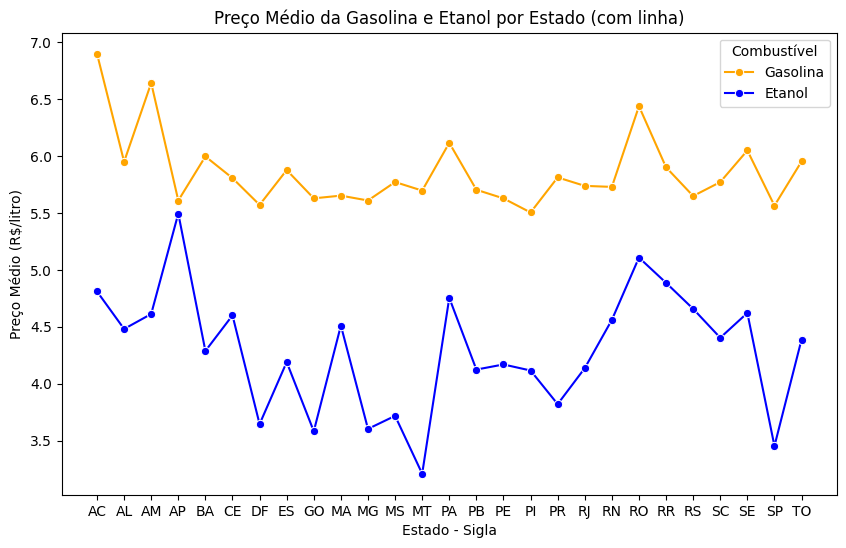

In [49]:
# Juntando os dataframes para facilitar a visualização
df = pd.DataFrame({'Gasolina': media_gasolina_por_estado, 'Etanol': media_etanol_por_estado}).reset_index()

# Criando o gráfico de linhas usando seaborn com cores personalizadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.melt('Estado - Sigla', var_name='Combustível', value_name='Preço Médio (R$/litro)'),
             x='Estado - Sigla', y='Preço Médio (R$/litro)', hue='Combustível', marker='o', palette={'Gasolina': 'orange', 'Etanol': 'blue'})
plt.title('Preço Médio da Gasolina e Etanol por Estado (com linha)')
plt.xlabel('Estado - Sigla')
plt.ylabel('Preço Médio (R$/litro)')

plt.show()

##***5. Qual o município que possui o menor preço para a gasolina e para o etanol?***

In [50]:
# Calcula o preço minimo da gasolina para cada estado
min_gasolina_por_estado = gasolina_df.groupby('Municipio')['Valor de Venda'].min()
min_gasolina_por_estado

Municipio
ABAETETUBA               5.75
ACAILANDIA               5.49
ADAMANTINA               5.18
AGUAS LINDAS DE GOIAS    5.19
ALAGOINHAS               5.26
                         ... 
VOLTA REDONDA            5.69
VOTORANTIM               4.99
VOTUPORANGA              4.99
XANXERE                  5.69
XINGUARA                 6.82
Name: Valor de Venda, Length: 459, dtype: float64

In [34]:
# Calcula o preço minimo do etanol para cada estado
min_etanol_por_estado = etanol_df.groupby('Municipio')['Valor de Venda'].min()
min_etanol_por_estado

Municipio
ACAILANDIA               4.49
ADAMANTINA               2.96
AGUAS LINDAS DE GOIAS    3.29
ALAGOINHAS               3.67
ALEGRETE                 4.99
                         ... 
VOLTA REDONDA            4.09
VOTORANTIM               3.15
VOTUPORANGA              3.06
XANXERE                  4.49
XINGUARA                 5.59
Name: Valor de Venda, Length: 452, dtype: float64

##***6. Qual o município que possui o maior preço para a gasolina e para o etanol?***


In [38]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço maximo da gasolina para cada estado
max_gasolina_por_estado = gasolina_df.groupby('Municipio')['Valor de Venda'].max()
max_gasolina_por_estado

Municipio
ABAETETUBA               6.35
ACAILANDIA               6.29
ADAMANTINA               5.69
AGUAS LINDAS DE GOIAS    5.89
ALAGOINHAS               5.99
                         ... 
VOLTA REDONDA            6.09
VOTORANTIM               6.30
VOTUPORANGA              5.99
XANXERE                  6.18
XINGUARA                 6.97
Name: Valor de Venda, Length: 459, dtype: float64

In [36]:
# Calcula o preço maximo do etanol para cada estado
max_etanol_por_estado = etanol_df.groupby('Municipio')['Valor de Venda'].max()
max_etanol_por_estado

Municipio
ACAILANDIA               4.69
ADAMANTINA               3.29
AGUAS LINDAS DE GOIAS    3.99
ALAGOINHAS               4.75
ALEGRETE                 4.99
                         ... 
VOLTA REDONDA            4.59
VOTORANTIM               4.40
VOTUPORANGA              3.44
XANXERE                  4.99
XINGUARA                 5.64
Name: Valor de Venda, Length: 452, dtype: float64

##***7. Qual a região que possui o maior valor médio da gasolina?***

In [32]:
# Calcula o preço maximo da gasolina para cada estado
max_gasolina_por_estado = dfproc[ (dfproc["Produto"] == "GASOLINA") & (dfproc["Valor de Venda"].mean() > dfproc["Valor de Venda"])]
max_gasolina_por_estado["Regiao - Sigla"]

149       NE
330       CO
962       SE
978       SE
980       SE
          ..
109688    SE
109711     S
109861    SE
109940    SE
110016    SE
Name: Regiao - Sigla, Length: 2407, dtype: object